In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
print(os.listdir("../input/leapgestrecog/leapGestRecog"))

# Any results you write to the current directory are saved as output.

['02', '00', '03', '06', '05', '09', '08', '07', '04', '01']


In [2]:
import os
import numpy as np
from PIL import Image
import matplotlib.image as mpimg 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import IPython.display
path='../input/leapgestrecog/leapGestRecog'
folders=os.listdir(path)
folders=set(folders)

import codecs
import json


different_classes=os.listdir(path+'/'+'00')
different_classes=set(different_classes)




print("The different classes that exist in this dataset are:")
print(different_classes,sep='\n')






The different classes that exist in this dataset are:
{'01_palm', '02_l', '06_index', '04_fist_moved', '09_c', '07_ok', '10_down', '05_thumb', '08_palm_moved', '03_fist'}


In [3]:
classes=dict()
names_of_classes=dict()
for i in different_classes:
    classes[int(i.split('_')[0])]='_'.join(i.split('_')[1:])
    names_of_classes['_'.join(i.split('_')[1:])]=int(i.split('_')[0])




print(classes)






{1: 'palm', 2: 'l', 6: 'index', 4: 'fist_moved', 9: 'c', 7: 'ok', 10: 'down', 5: 'thumb', 8: 'palm_moved', 3: 'fist'}


In [4]:
x=[]
z=[]
y=[]#converting the image to black and white
threshold=200
import cv2


for i in folders:
    print('***',i,'***')
    subject=path+'/'+i
    subdir=os.listdir(subject)
    subdir=set(subdir)
    for j in subdir:
        print(j)
        images=os.listdir(subject+'/'+j)
        for k in images:
            results=dict()
            results['y']=j.split('_')[0]
            img = cv2.imread(subject+'/'+j+'/'+k,0)
            img=cv2.resize(img,(int(160),int(60)))
            
            ret, imgf = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
            imgD=np.asarray(img,dtype=np.float64)
            z.append(imgD)
            imgf=np.asarray(imgf,dtype=np.float64)
            x.append(imgf)
            y.append(int(j.split('_')[0]))
            results['x']=imgf

print(list(set(y)))
        
# import pandas as pd 
# df=pd.DataFrame({'x':x,'y':y})
# df.to_csv('results.csv',index=False)


*** 00 ***
01_palm
02_l
06_index
04_fist_moved
09_c
07_ok
10_down
05_thumb
08_palm_moved
03_fist
*** 07 ***
01_palm
02_l
06_index
04_fist_moved
09_c
07_ok
10_down
05_thumb
08_palm_moved
03_fist
*** 01 ***
01_palm
02_l
06_index
04_fist_moved
09_c
07_ok
10_down
05_thumb
08_palm_moved
03_fist
*** 08 ***
01_palm
02_l
06_index
04_fist_moved
09_c
07_ok
10_down
05_thumb
08_palm_moved
03_fist
*** 09 ***
01_palm
02_l
06_index
04_fist_moved
09_c
07_ok
10_down
05_thumb
08_palm_moved
03_fist
*** 04 ***
01_palm
02_l
06_index
04_fist_moved
09_c
07_ok
10_down
05_thumb
08_palm_moved
03_fist
*** 03 ***
01_palm
02_l
06_index
04_fist_moved
09_c
07_ok
10_down
05_thumb
08_palm_moved
03_fist
*** 02 ***
01_palm
02_l
06_index
04_fist_moved
09_c
07_ok
10_down
05_thumb
08_palm_moved
03_fist
*** 06 ***
01_palm
02_l
06_index
04_fist_moved
09_c
07_ok
10_down
05_thumb
08_palm_moved
03_fist
*** 05 ***
01_palm
02_l
06_index
04_fist_moved
09_c
07_ok
10_down
05_thumb
08_palm_moved
03_fist
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10

Class Label: 1


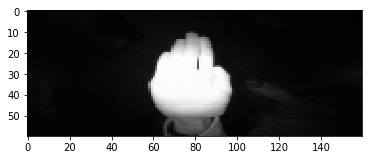

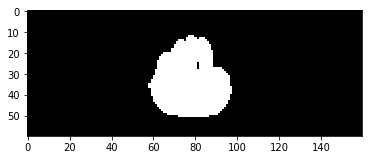

Class Label: 2


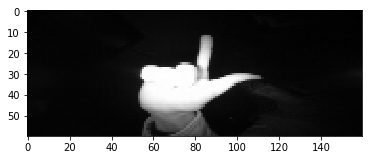

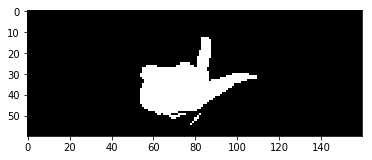

Class Label: 3


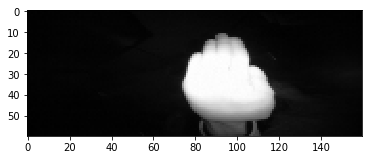

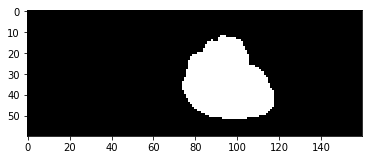

Class Label: 4


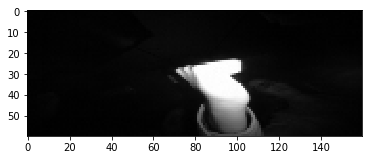

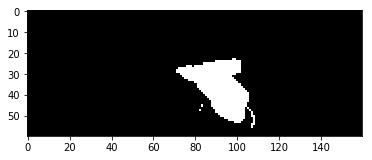

Class Label: 5


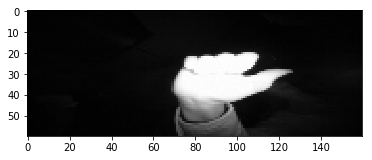

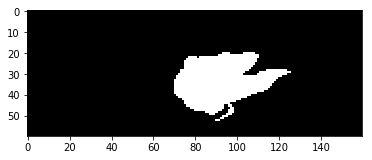

Class Label: 6


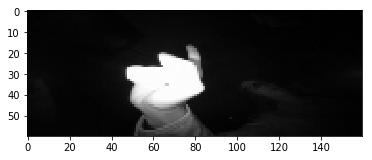

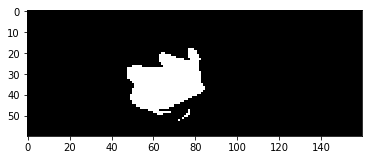

Class Label: 7


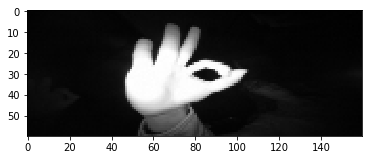

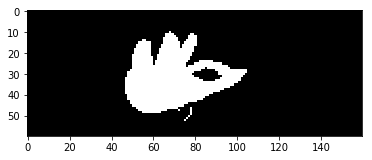

Class Label: 8


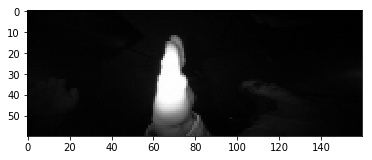

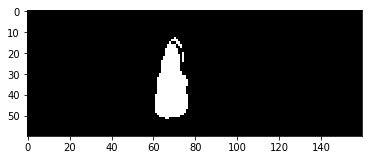

Class Label: 9


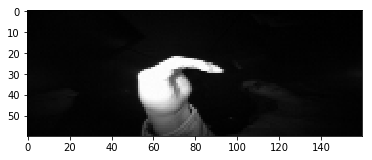

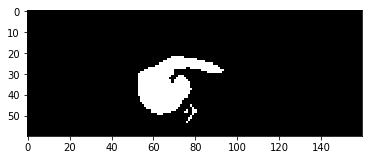

Class Label: 10


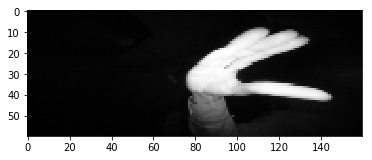

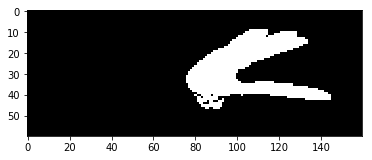

In [5]:
#sample black and white image from each class
l = []
list_names = []
for i in range(10):
    l.append(0)
for i in range(len(x)):
    if(l[y[i] - 1] == 0):
        l[y[i] - 1] = i
        if(len(np.unique(l)) == 10):
            break
for i in range(len(l)):
    %matplotlib inline
    print("Class Label: " + str(i + 1))
    plt.imshow(np.asarray(z[l[i]]), cmap  =cm.gray)
    plt.show()
    plt.imshow(np.asarray(x[l[i]]), cmap = cm.gray)     
    plt.show()
    


In [6]:
x=np.array(x)
y=np.array(y)
y = y.reshape(len(x), 1)
print(x.shape)
print(y.shape)
print(max(y),min(y))

(20000, 60, 160)
(20000, 1)
[10] [1]


In [7]:
np.unique(y)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [8]:
import keras
from keras.utils import to_categorical
def one_hot_encoded(y):
    p=list(np.unique(y))
    dictionary=dict()
    final_result=[]
    for i in range(len(p)):
        dictionary[p[i]]=i
    for i in y:
        actual=[0 for j in range(len(p))]
        actual[dictionary[i[0]]]=1
        final_result.append(actual)
    return np.array(final_result)
        
        
    
y_data = one_hot_encoded(y)
print(y_data[0])
print(type(y_data))

Using TensorFlow backend.


[1 0 0 0 0 0 0 0 0 0]
<class 'numpy.ndarray'>


In [9]:
x_data = x.reshape((len(x), 60, 160, 1))

x_data/=255
print(x_data.shape)

(20000, 60, 160, 1)


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_further,y_train,y_further = train_test_split(x_data,y_data,test_size = 0.2)
x_validate,x_test,y_validate,y_test = train_test_split(x_further,y_further,test_size = 0.5)

In [11]:
from keras import layers
from keras import models

In [12]:
model=models.Sequential()
model.add(layers.Conv2D(32, (5, 5), strides=(2, 2), activation='relu', input_shape=(60, 160,1))) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_validate, y_validate))

Instructions for updating:
Use tf.cast instead.
Train on 16000 samples, validate on 2000 samples
Epoch 1/10
16000/16000 [==============================] - 4s 249us/step - loss: 0.3475 - acc: 0.8860 - val_loss: 0.6396 - val_acc: 0.8260
Epoch 2/10
16000/16000 [==============================] - 2s 112us/step - loss: 0.0274 - acc: 0.9931 - val_loss: 0.0012 - val_acc: 1.0000
Epoch 3/10
16000/16000 [==============================] - 2s 111us/step - loss: 0.0130 - acc: 0.9977 - val_loss: 8.1108e-05 - val_acc: 1.0000
Epoch 4/10
16000/16000 [==============================] - 2s 112us/step - loss: 0.0074 - acc: 0.9983 - val_loss: 1.1096e-04 - val_acc: 1.0000
Epoch 5/10
16000/16000 [==============================] - 2s 111us/step - loss: 0.0060 - acc: 0.9987 - val_loss: 4.3905e-05 - val_acc: 1.0000
Epoch 6/10
16000/16000 [==============================] - 2s 111us/step - loss: 0.0034 - acc: 0.9991 - val_loss: 4.8536e-06 - val_acc: 1.0000
Epoch 7/10
16000/16000 [==============================] - 2

In [14]:
model.save('cnn_results.h5')

In [15]:
[loss, acc] = model.evaluate(x_test,y_test,verbose=1)
print("Accuracy:" + str(acc))

2000/2000 [==============================] - 0s 82us/step
Accuracy:0.9995
